In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
df.shape

(142193, 24)

In [6]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

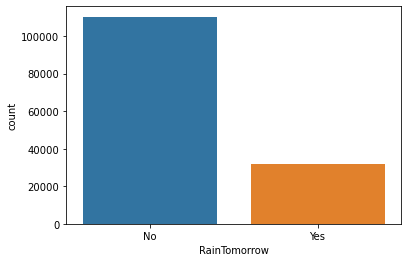

In [7]:
sns.countplot(data=df,x=df['RainTomorrow']);

In [8]:
no = df[df['RainTomorrow'] == 'No']
no.shape

(110316, 24)

In [9]:
yes = df[df['RainTomorrow'] == 'Yes']
yes.shape

(31877, 24)

# Preprocessing 

In [10]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [11]:
percent_nan = percent_missing(df)

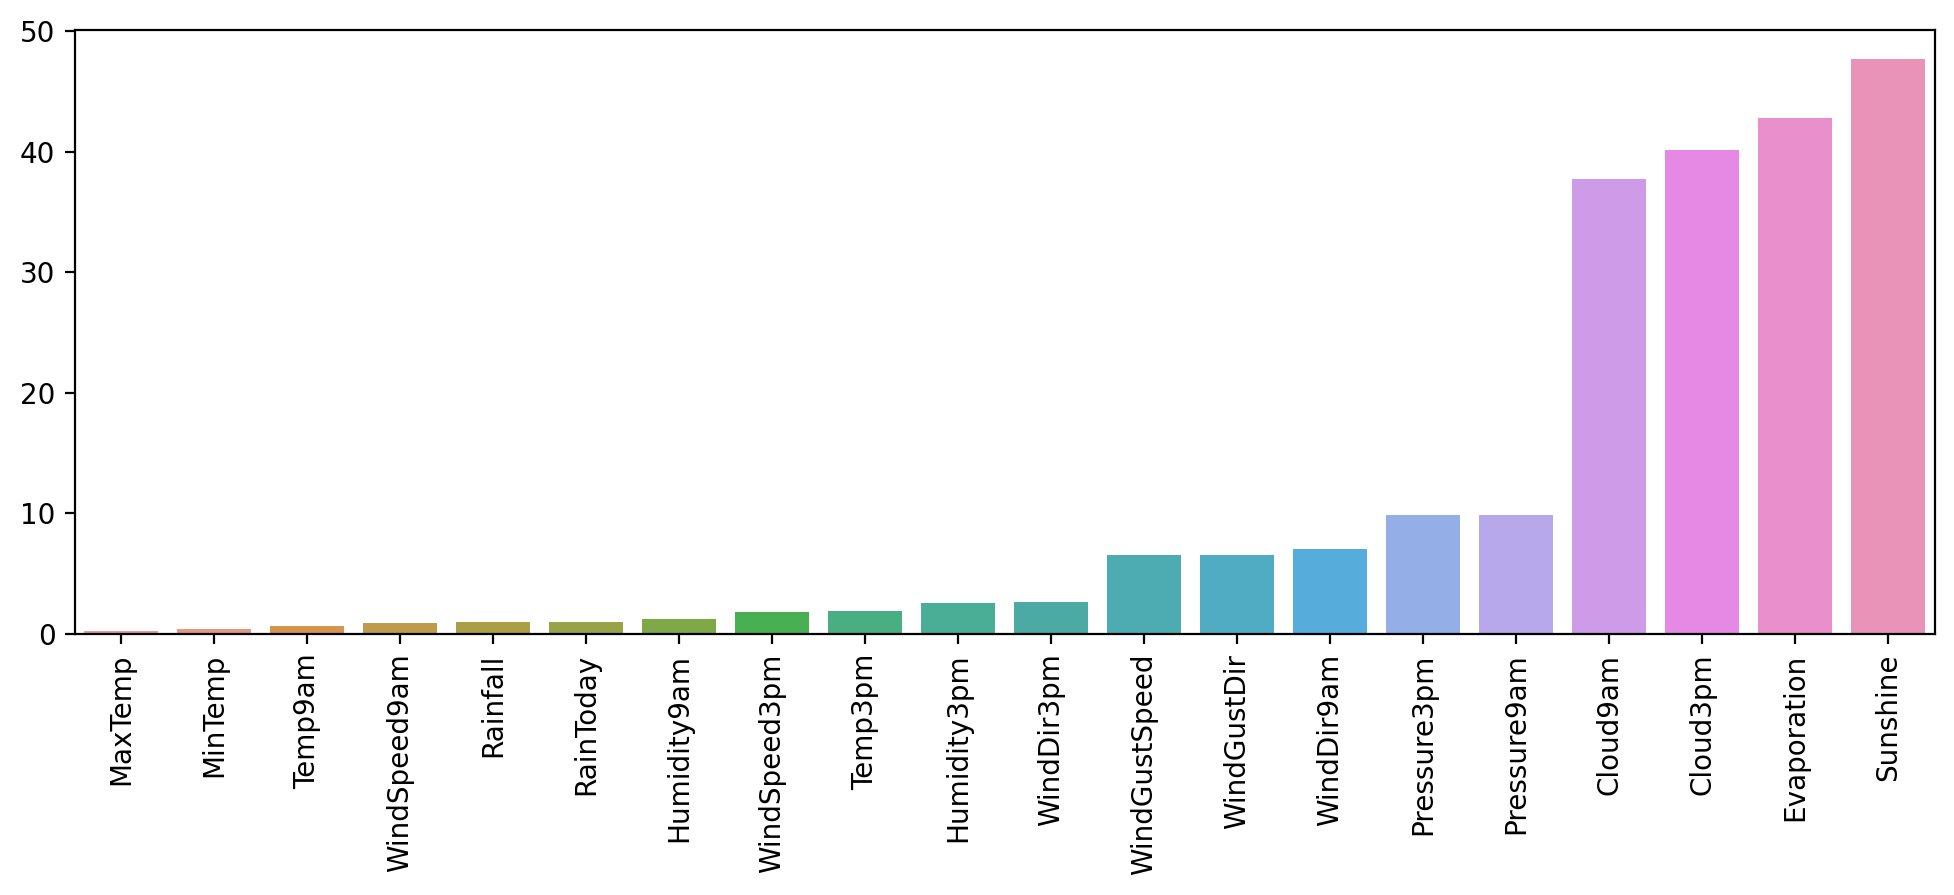

In [12]:
percent_nan = percent_missing(df)

plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [13]:
df = df.drop('Date',axis=1)

In [14]:
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

In [15]:
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean()) 

In [16]:
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())

df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

In [17]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

In [18]:
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

In [19]:
df['RainToday'] = df['RainToday'].fillna('No')

In [20]:
# function to add prefix in object columns

def add_prefix(df,col_name,prefix):
    return df[col_name].apply(lambda x: prefix + str(x))

In [21]:
df['WindDir3pm'] = add_prefix(df,'WindDir3pm','3pm_')

In [22]:
df['WindDir9am'] = add_prefix(df,'WindDir9am','9am_')

In [23]:
df['WindDir3pm'].unique()

array(['3pm_WNW', '3pm_WSW', '3pm_E', '3pm_NW', '3pm_W', '3pm_SSE',
       '3pm_ESE', '3pm_ENE', '3pm_NNW', '3pm_SSW', '3pm_SW', '3pm_SE',
       '3pm_N', '3pm_S', '3pm_NNE', '3pm_NE'], dtype=object)

In [24]:
df['RainToday'] = df['RainToday'].replace(to_replace='No',value=0)
df['RainToday'] = df['RainToday'].replace(to_replace='Yes',value=1)

In [25]:
df['RainTomorrow'] = df['RainTomorrow'].replace(to_replace='No',value=0)
df['RainTomorrow'] = df['RainTomorrow'].replace(to_replace='Yes',value=1)

In [26]:
df['RainTomorrow'].unique()

array([0, 1], dtype=int64)

In [27]:
df_numeric = df.select_dtypes(exclude='object')

In [28]:
df_object = df.select_dtypes(include='object')

In [29]:
df_object_dummies = pd.get_dummies(data=df_object,drop_first=True)

In [30]:
df_object_dummies

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_3pm_NNW,WindDir3pm_3pm_NW,WindDir3pm_3pm_S,WindDir3pm_3pm_SE,WindDir3pm_3pm_SSE,WindDir3pm_3pm_SSW,WindDir3pm_3pm_SW,WindDir3pm_3pm_W,WindDir3pm_3pm_WNW,WindDir3pm_3pm_WSW
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
final_df = pd.concat([df_numeric,df_object_dummies],axis=1,)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

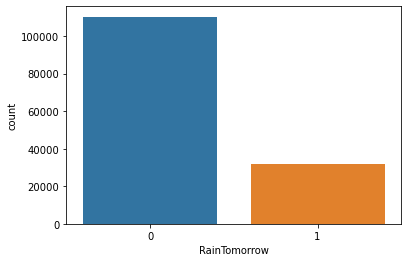

In [41]:
sns.countplot(data=df,x=df['RainTomorrow'])